In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [97]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [98]:
data = pd.read_csv("../data/clean_mobile_price.csv")

In [99]:
#data

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5492 entries, 0 to 5491
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   phone_name             5492 non-null   object
 1   status                 5492 non-null   object
 2   rating                 5492 non-null   int64 
 3   bonus                  5492 non-null   int64 
 4   price_before_discount  5492 non-null   int64 
 5   price                  5492 non-null   int64 
 6   brand                  5492 non-null   object
 7   discount_procent       5492 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 343.4+ KB


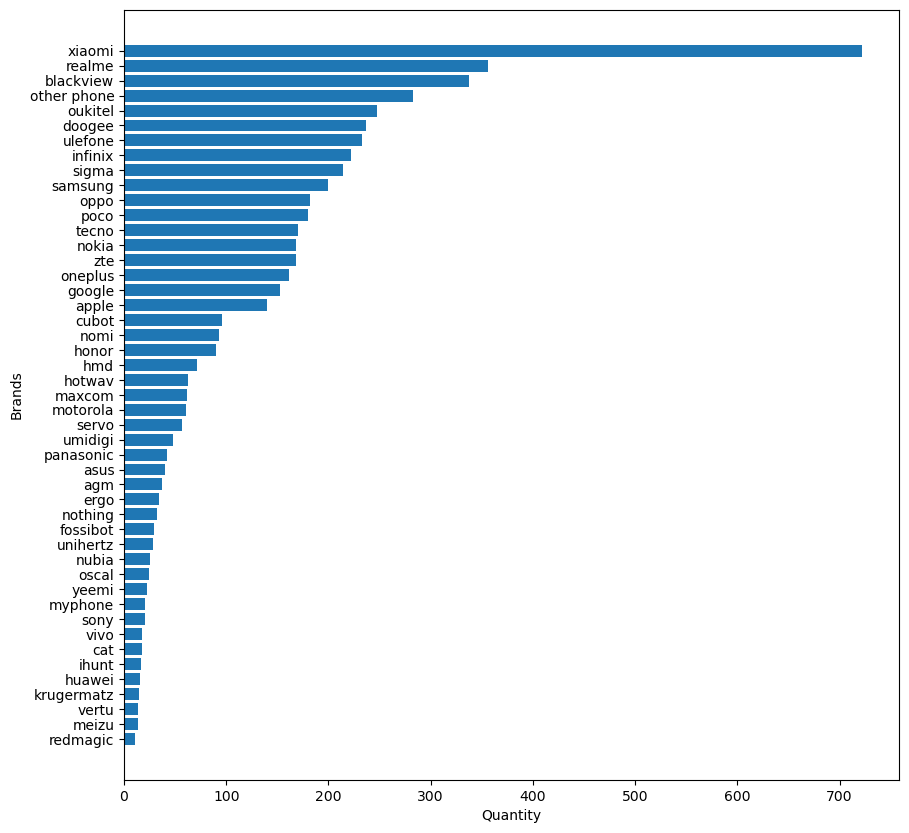

In [101]:
mobile_quantity = data["brand"].value_counts()
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("Quantity")
ax.set_ylabel("Brands")
ax.barh(mobile_quantity.index, mobile_quantity.values)
fig.gca().invert_yaxis()

In [102]:
data = data[data["brand"] != "other phone"]

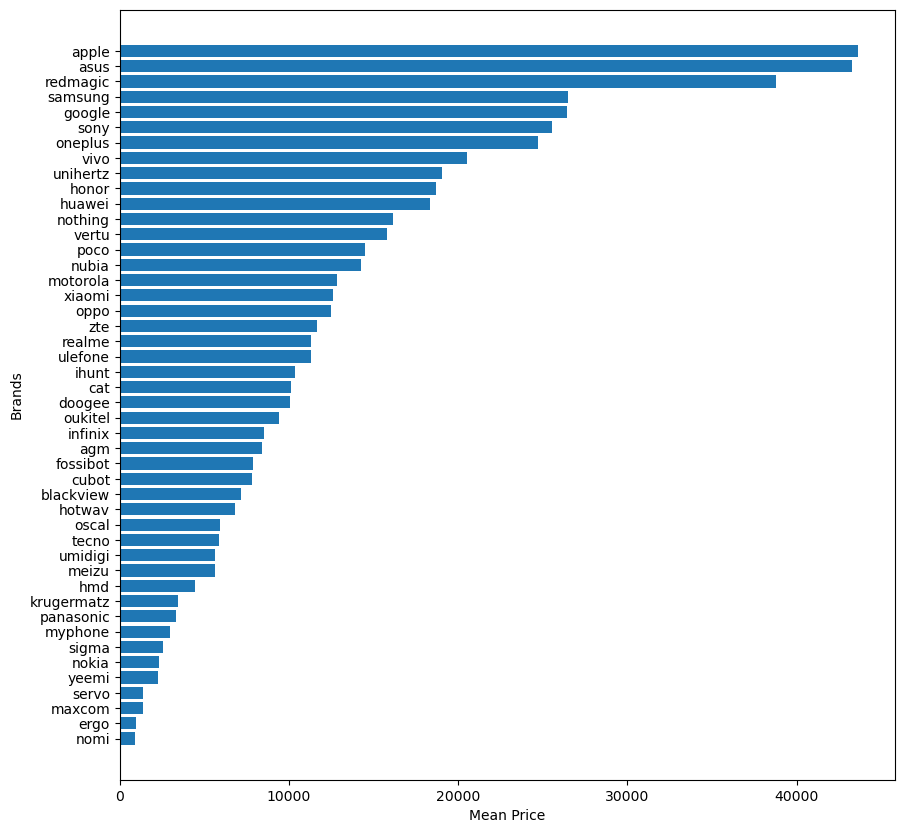

In [103]:
mean_price = data.groupby("brand")["price"].mean().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("Mean Price")
ax.set_ylabel("Brands")
ax.barh(mean_price.index, mean_price.values)
fig.gca().invert_yaxis()

(array([1051., 1433.,  833.,  511.,  375.,  217.,  195.,  111.,   92.,
          68.,   75.,   63.,   51.,   42.,   12.,   20.,   12.,   12.,
          11.,    5.,    4.,    4.,    0.,    9.,    3.]),
 array([  416.  ,  3999.32,  7582.64, 11165.96, 14749.28, 18332.6 ,
        21915.92, 25499.24, 29082.56, 32665.88, 36249.2 , 39832.52,
        43415.84, 46999.16, 50582.48, 54165.8 , 57749.12, 61332.44,
        64915.76, 68499.08, 72082.4 , 75665.72, 79249.04, 82832.36,
        86415.68, 89999.  ]),
 <BarContainer object of 25 artists>)

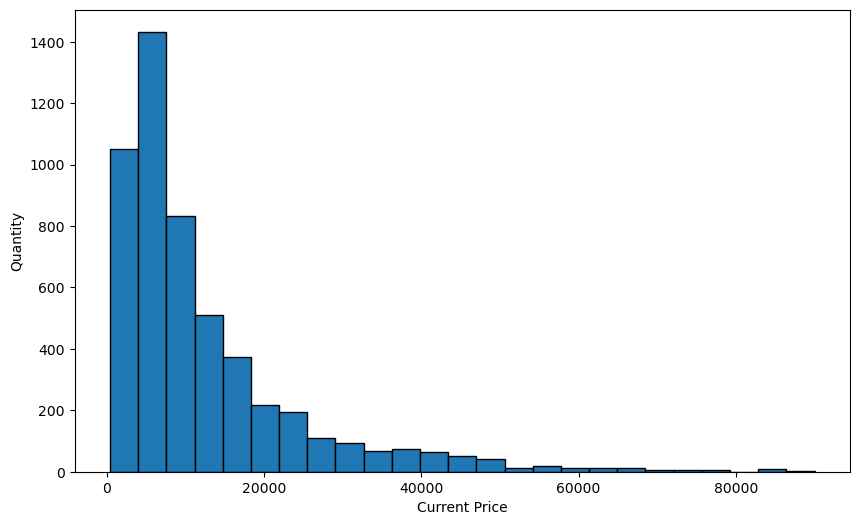

In [104]:
current_price = data["price"]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel("Current Price")
ax.set_ylabel("Quantity")
ax.hist(current_price, bins=25, edgecolor="black")

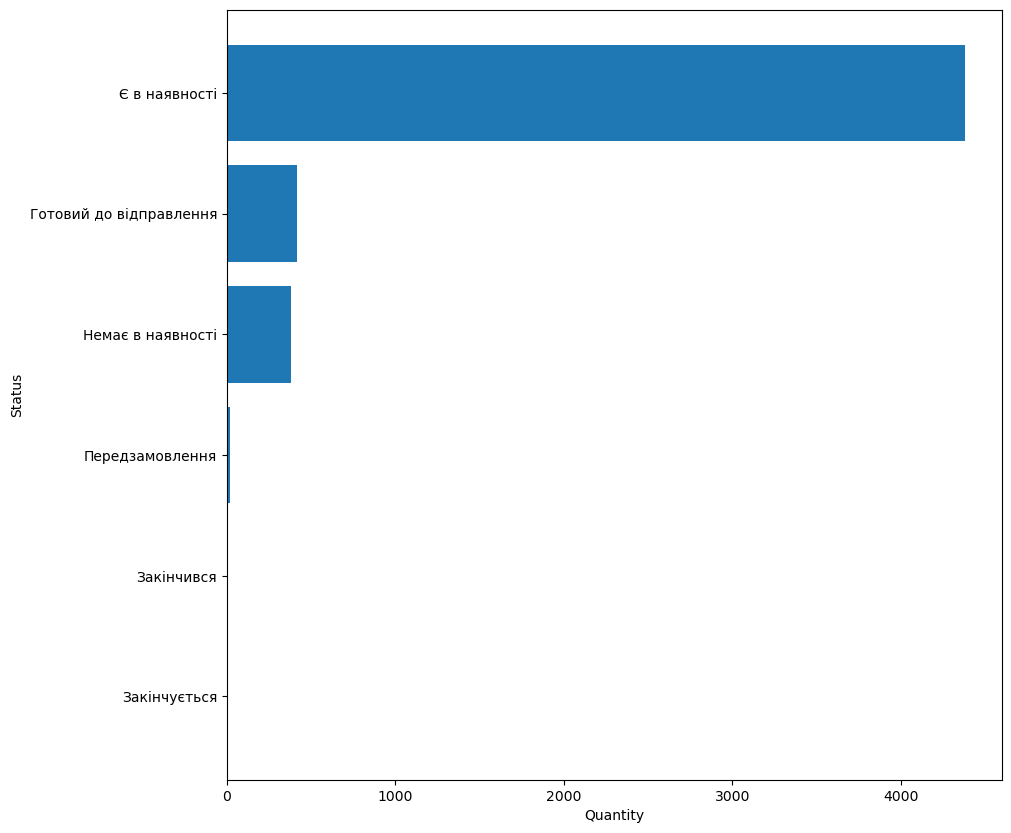

In [105]:
status_distribution = data["status"].value_counts()
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("Quantity")
ax.set_ylabel("Status")
ax.barh(status_distribution.index, status_distribution.values)
fig.gca().invert_yaxis()

In [110]:
top5_by_max_price = data.sort_values(by='price', ascending=False).head(5)
display(top5_by_max_price)
top5_by_min_price = data.sort_values(by='price', ascending=True).head(5)
display(top5_by_min_price)

,phone_name,status,rating,bonus,price_before_discount,price,brand,discount_procent
86,samsung galaxy fold 7 16gb/1tb blue shadow (sm...,Передзамовлення,1,899,99999,89999,samsung,11
154,samsung galaxy fold 7 16gb/1tb jet black (smf9...,Передзамовлення,1,899,99999,89999,samsung,11
180,samsung galaxy fold 7 16gb/1tb jet black (smf9...,Передзамовлення,1,899,99999,89999,samsung,11
310,samsung galaxy fold 7 12/256gb blue shadow (sm...,Передзамовлення,1,849,0,84999,samsung,0
5171,samsung galaxy fold 7 12/512gb jet black (smf9...,Немає в наявності,1,0,89999,84999,samsung,6


,phone_name,status,rating,bonus,price_before_discount,price,brand,discount_procent
767,nomi i1441 dual sim grey,Є в наявності,0,0,459,416,nomi,10
422,nomi i1441 blue (001011591105),Є в наявності,8,4,0,429,nomi,0
392,nomi i1441 blue (001011591105),Є в наявності,8,4,0,429,nomi,0
270,nomi i1441 grey (001011591099),Є в наявності,8,4,0,429,nomi,0
909,nomi i1441 blue,Є в наявності,0,0,556,496,nomi,11


In [111]:
top5_by_max_rating = data.sort_values(by='rating', ascending=False).head(5)
display(top5_by_max_rating)
top5_by_min_rating = data.sort_values(by='rating', ascending=True).head(5)
display(top5_by_min_rating)

,phone_name,status,rating,bonus,price_before_discount,price,brand,discount_procent
5219,samsung galaxy a24 6/128gb light green (sma245...,Немає в наявності,832,0,8499,6999,samsung,18
5191,samsung galaxy a24 6/128gb dark red (sma245fdr...,Немає в наявності,832,0,0,8499,samsung,0
29,motorola g54 power 12/256gb esim mint green (1...,Готовий до відправлення,669,74,9999,7499,motorola,26
5181,motorola g54 power 12/256gb esim midnight blue...,Немає в наявності,669,0,10799,7499,motorola,31
104,motorola g54 power 12/256gb esim pearl blue (1...,Готовий до відправлення,669,74,9999,7499,motorola,26


,phone_name,status,rating,bonus,price_before_discount,price,brand,discount_procent
4159,umidigi g5 mecha 8/128gb gray,Є в наявності,0,0,0,5258,umidigi,0
4158,oukitel wp35s 6/256gb gray (global version) nfc,Є в наявності,0,0,0,6558,oukitel,0
4157,ergo e281 dual sim black (6653749),Є в наявності,0,0,0,999,ergo,0
4156,oneplus nord n20 se 4/64gb celestial black,Є в наявності,0,0,9999,8599,oneplus,15
4155,realme 9 6/128gb meteor black,Є в наявності,0,0,11499,11099,realme,4


In [112]:
top5_by_discount = data.sort_values(by='discount_procent', ascending=False).head(5)
display(top5_by_price)

,phone_name,status,rating,bonus,price_before_discount,price,brand,discount_procent
3424,fossibot f112 pro 8/256gb blue ( ),Є в наявності,0,0,29999,9149,fossibot,70
1511,ihunt primo 4g 4g/lte sim 24 18002500mah ...,Є в наявності,0,0,5500,2000,ihunt,64
1006,ihunt titan survivor 4g 4500,Є в наявності,0,0,5500,2909,ihunt,48
781,ihunt s22 plus blue,Є в наявності,3,0,6000,3199,ihunt,47
1015,ihunt s22 plus blue,Є в наявності,3,0,6000,3199,ihunt,47
